**Hoja de Trabajo #4** <br>
***Arboles de decision*** <br>
Diego Ruiz 18761, Jose Jorge Perez 18364

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
import seaborn as sb
import random
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

1. Use los mismos conjuntos de entrenamiento y prueba que usó para los árboles de decisión en la hoja de trabajo anterior.

In [122]:
datos = pd.read_csv("train.csv")

datos = datos.select_dtypes(include='number').dropna(axis=0)
random.seed(42)
print(datos)

datos.groupby('SalePrice').size()

Y = datos.pop("SalePrice")
X = datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,train_size=0.7)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

2. Elabore un árbol de regresión para predecir el precio de las casas usando todas las variables.

[Text(0.5267857142857143, 0.9, 'FullBath <= 1.5\ngini = 0.996\nsamples = 784\nvalue = [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2\n1, 1, 1, 2, 1, 2, 1, 3, 3, 1, 2, 1, 3, 1\n1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2\n1, 1, 4, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1\n3, 7, 1, 1, 3, 2, 5, 2, 1, 6, 1, 1, 4, 1\n3, 1, 2, 1, 4, 1, 2, 1, 5, 2, 2, 2, 1, 4\n1, 3, 3, 1, 7, 3, 2, 1, 1, 3, 2, 4, 1, 1\n7, 2, 2, 9, 1, 1, 1, 2, 4, 1, 3, 5, 1, 1\n2, 2, 1, 2, 1, 7, 2, 2, 1, 1, 2, 1, 1, 2\n1, 1, 8, 2, 1, 1, 11, 3, 1, 1, 2, 1, 6, 6\n1, 1, 8, 1, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1\n1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 14\n1, 1, 2, 1, 1, 5, 1, 2, 1, 3, 1, 2, 1, 1\n8, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 3, 1\n2, 2, 3, 2, 2, 1, 1, 1, 1, 6, 3, 1, 1, 3\n1, 2, 1, 1, 4, 1, 1, 6, 2, 2, 4, 1, 1, 2\n3, 1, 3, 1, 2, 1, 1, 3, 4, 2, 4, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1\n5, 4, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2\n2, 4, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1\n3, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 2, 2,

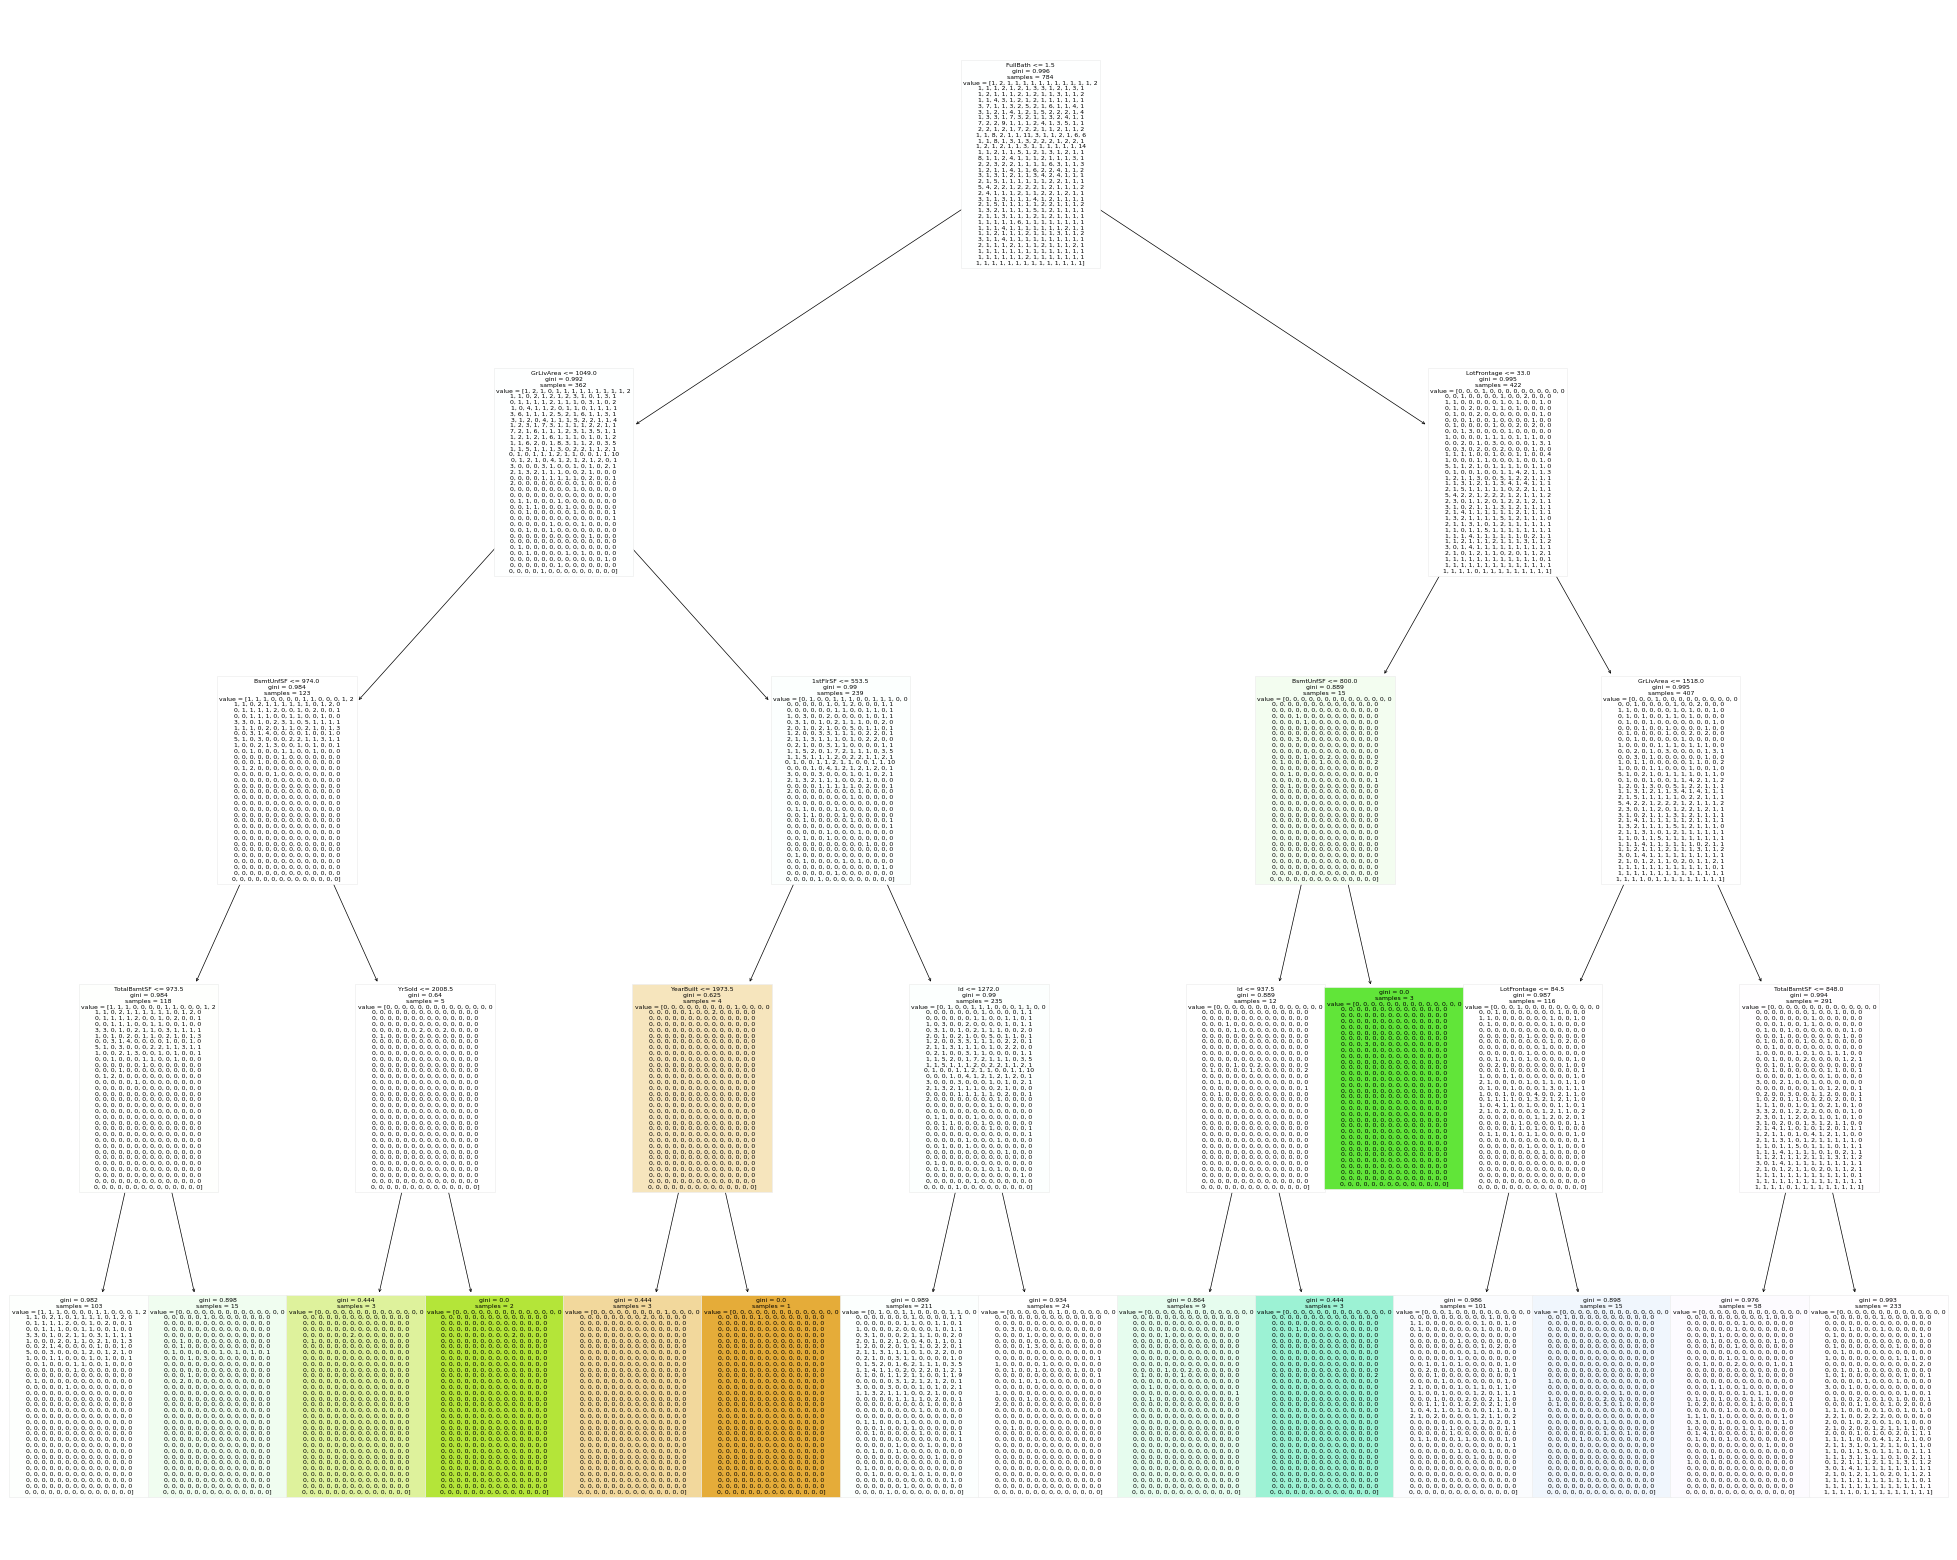

In [123]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42 ) 
arbol = arbol.fit(X_train, y_train) 

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=X.columns, filled=True)

3. Úselo para predecir y analice el resultado. ¿Qué tal lo hizo?

In [124]:
y_pred = arbol.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))

Accuracy: 0.002967359050445104
Precision: 0.0006594131223211342
Recall:  0.002967359050445104


4. Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol. ¿Cuál es el mejor modelo para predecir el precio de las casas?

Accuracy: 0.008902077151335312
Precision: 0.004585918532506069
Recall:  0.008902077151335312


[Text(0.5267857142857143, 0.9, 'FullBath <= 1.5\ngini = 0.996\nsamples = 784\nvalue = [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2\n1, 1, 1, 2, 1, 2, 1, 3, 3, 1, 2, 1, 3, 1\n1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2\n1, 1, 4, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1\n3, 7, 1, 1, 3, 2, 5, 2, 1, 6, 1, 1, 4, 1\n3, 1, 2, 1, 4, 1, 2, 1, 5, 2, 2, 2, 1, 4\n1, 3, 3, 1, 7, 3, 2, 1, 1, 3, 2, 4, 1, 1\n7, 2, 2, 9, 1, 1, 1, 2, 4, 1, 3, 5, 1, 1\n2, 2, 1, 2, 1, 7, 2, 2, 1, 1, 2, 1, 1, 2\n1, 1, 8, 2, 1, 1, 11, 3, 1, 1, 2, 1, 6, 6\n1, 1, 8, 1, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1\n1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 14\n1, 1, 2, 1, 1, 5, 1, 2, 1, 3, 1, 2, 1, 1\n8, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 3, 1\n2, 2, 3, 2, 2, 1, 1, 1, 1, 6, 3, 1, 1, 3\n1, 2, 1, 1, 4, 1, 1, 6, 2, 2, 4, 1, 1, 2\n3, 1, 3, 1, 2, 1, 1, 3, 4, 2, 4, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1\n5, 4, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2\n2, 4, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1\n3, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 2, 2,

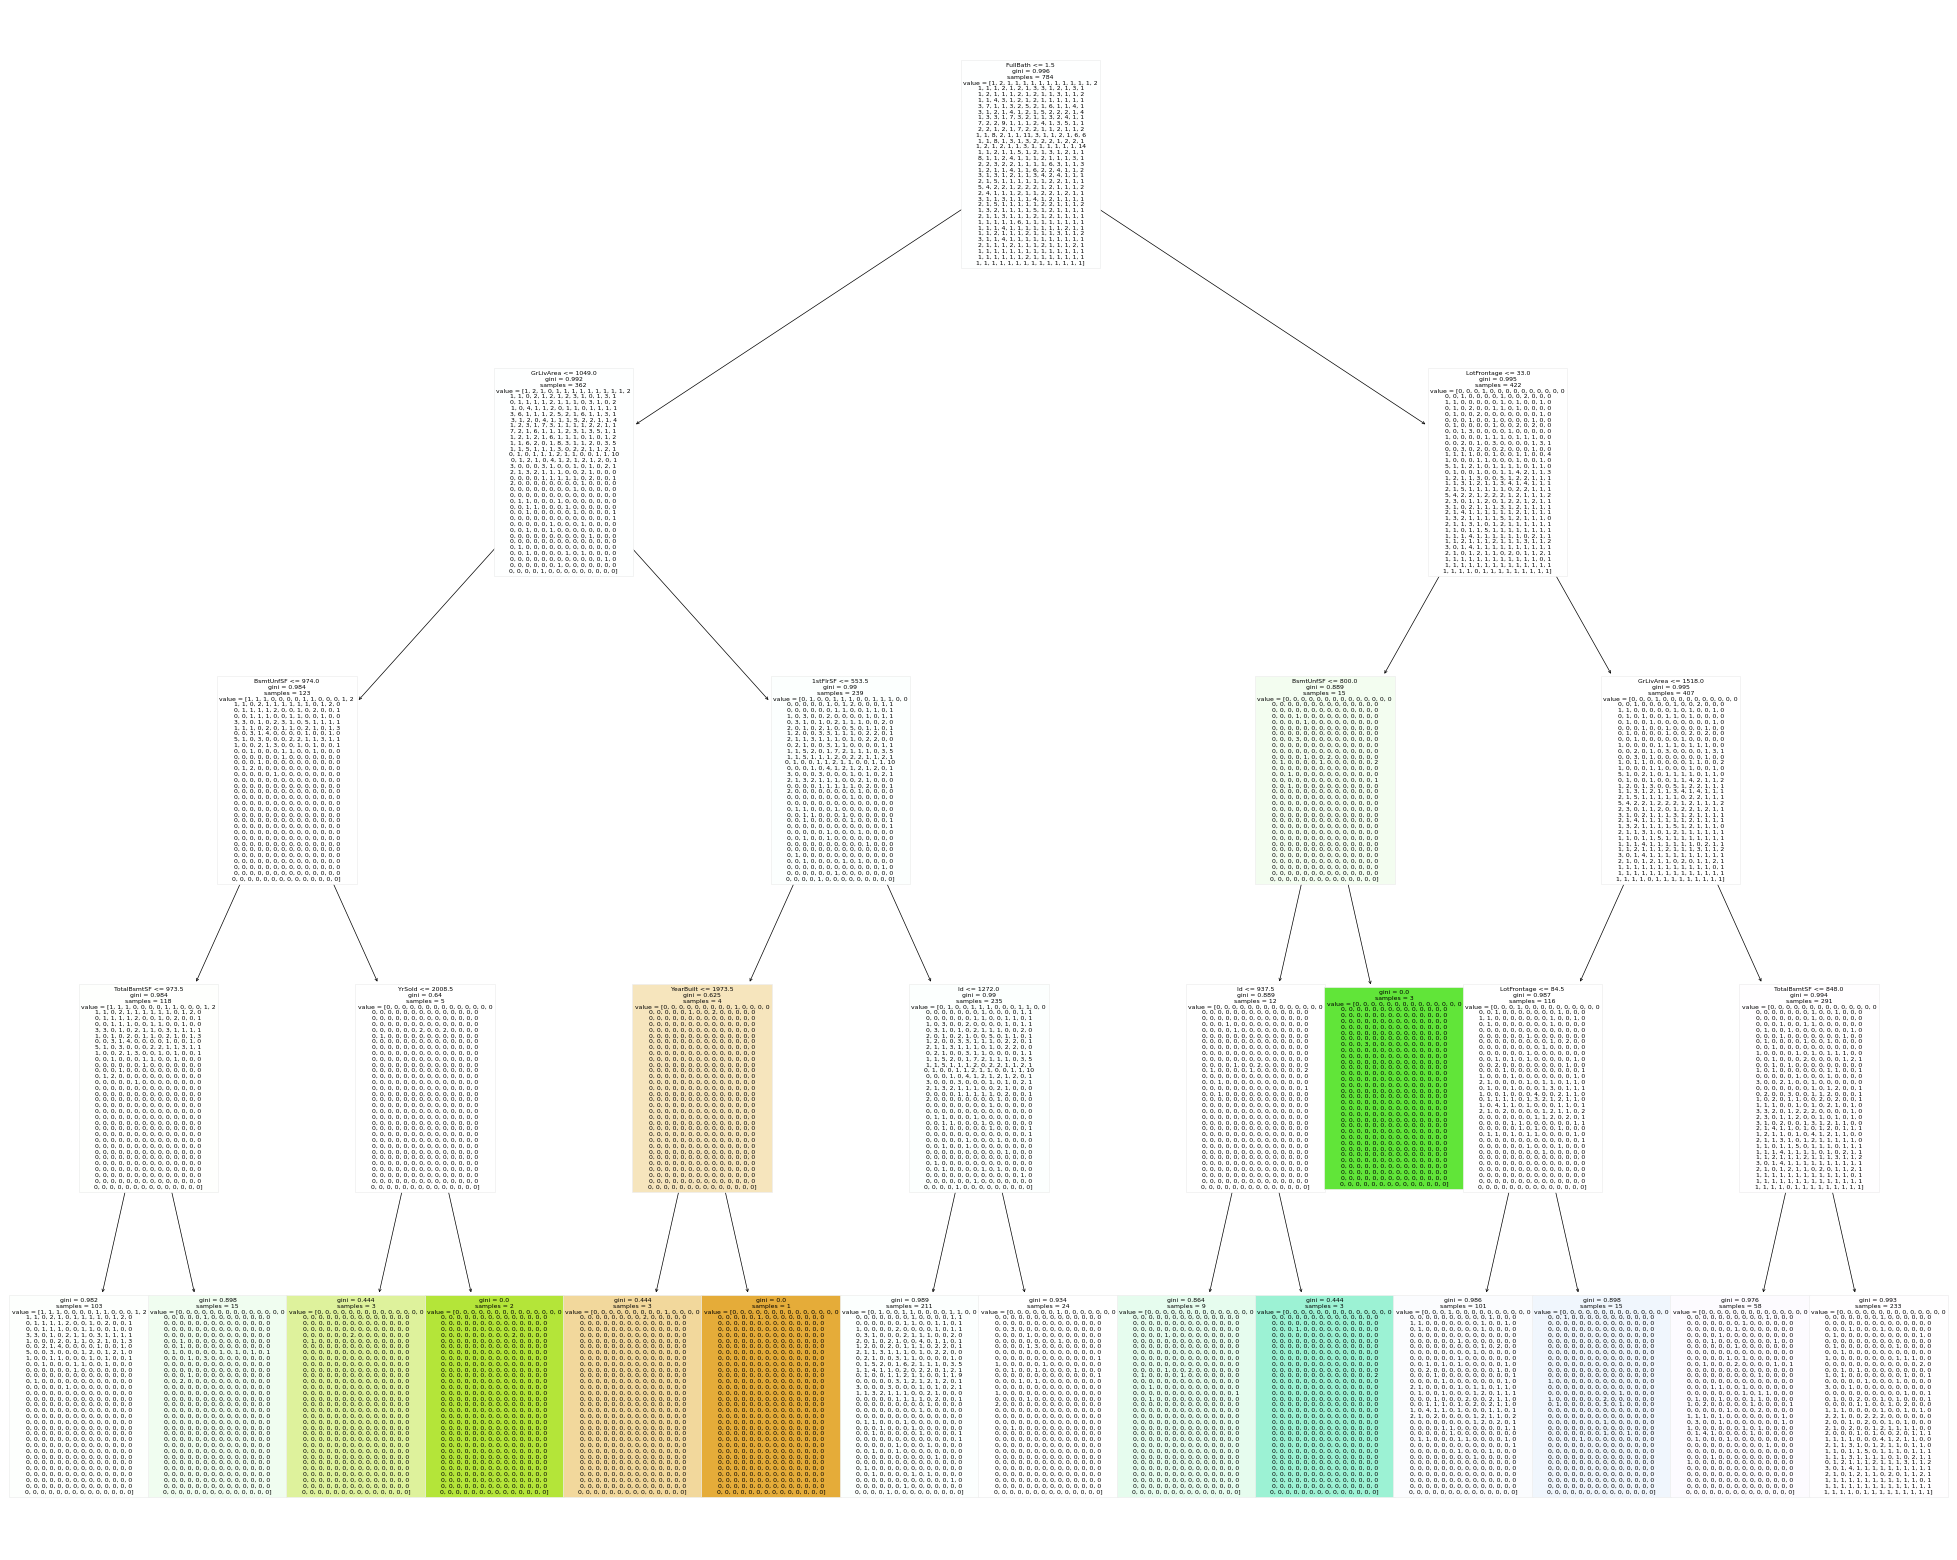

In [125]:
model1 = DecisionTreeClassifier(max_depth=6, random_state=42)
model1 = model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print ("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print ("Precision:", metrics.precision_score(y_test,y_pred1,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred1,average='weighted', zero_division=0))

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=X.columns, filled=True)

Accuracy: 0.01483679525222552
Precision: 0.004582487375709304
Recall:  0.01483679525222552


[Text(0.5267857142857143, 0.9, 'FullBath <= 1.5\ngini = 0.996\nsamples = 784\nvalue = [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2\n1, 1, 1, 2, 1, 2, 1, 3, 3, 1, 2, 1, 3, 1\n1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2\n1, 1, 4, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1\n3, 7, 1, 1, 3, 2, 5, 2, 1, 6, 1, 1, 4, 1\n3, 1, 2, 1, 4, 1, 2, 1, 5, 2, 2, 2, 1, 4\n1, 3, 3, 1, 7, 3, 2, 1, 1, 3, 2, 4, 1, 1\n7, 2, 2, 9, 1, 1, 1, 2, 4, 1, 3, 5, 1, 1\n2, 2, 1, 2, 1, 7, 2, 2, 1, 1, 2, 1, 1, 2\n1, 1, 8, 2, 1, 1, 11, 3, 1, 1, 2, 1, 6, 6\n1, 1, 8, 1, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1\n1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 14\n1, 1, 2, 1, 1, 5, 1, 2, 1, 3, 1, 2, 1, 1\n8, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 3, 1\n2, 2, 3, 2, 2, 1, 1, 1, 1, 6, 3, 1, 1, 3\n1, 2, 1, 1, 4, 1, 1, 6, 2, 2, 4, 1, 1, 2\n3, 1, 3, 1, 2, 1, 1, 3, 4, 2, 4, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1\n5, 4, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2\n2, 4, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1\n3, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 2, 2,

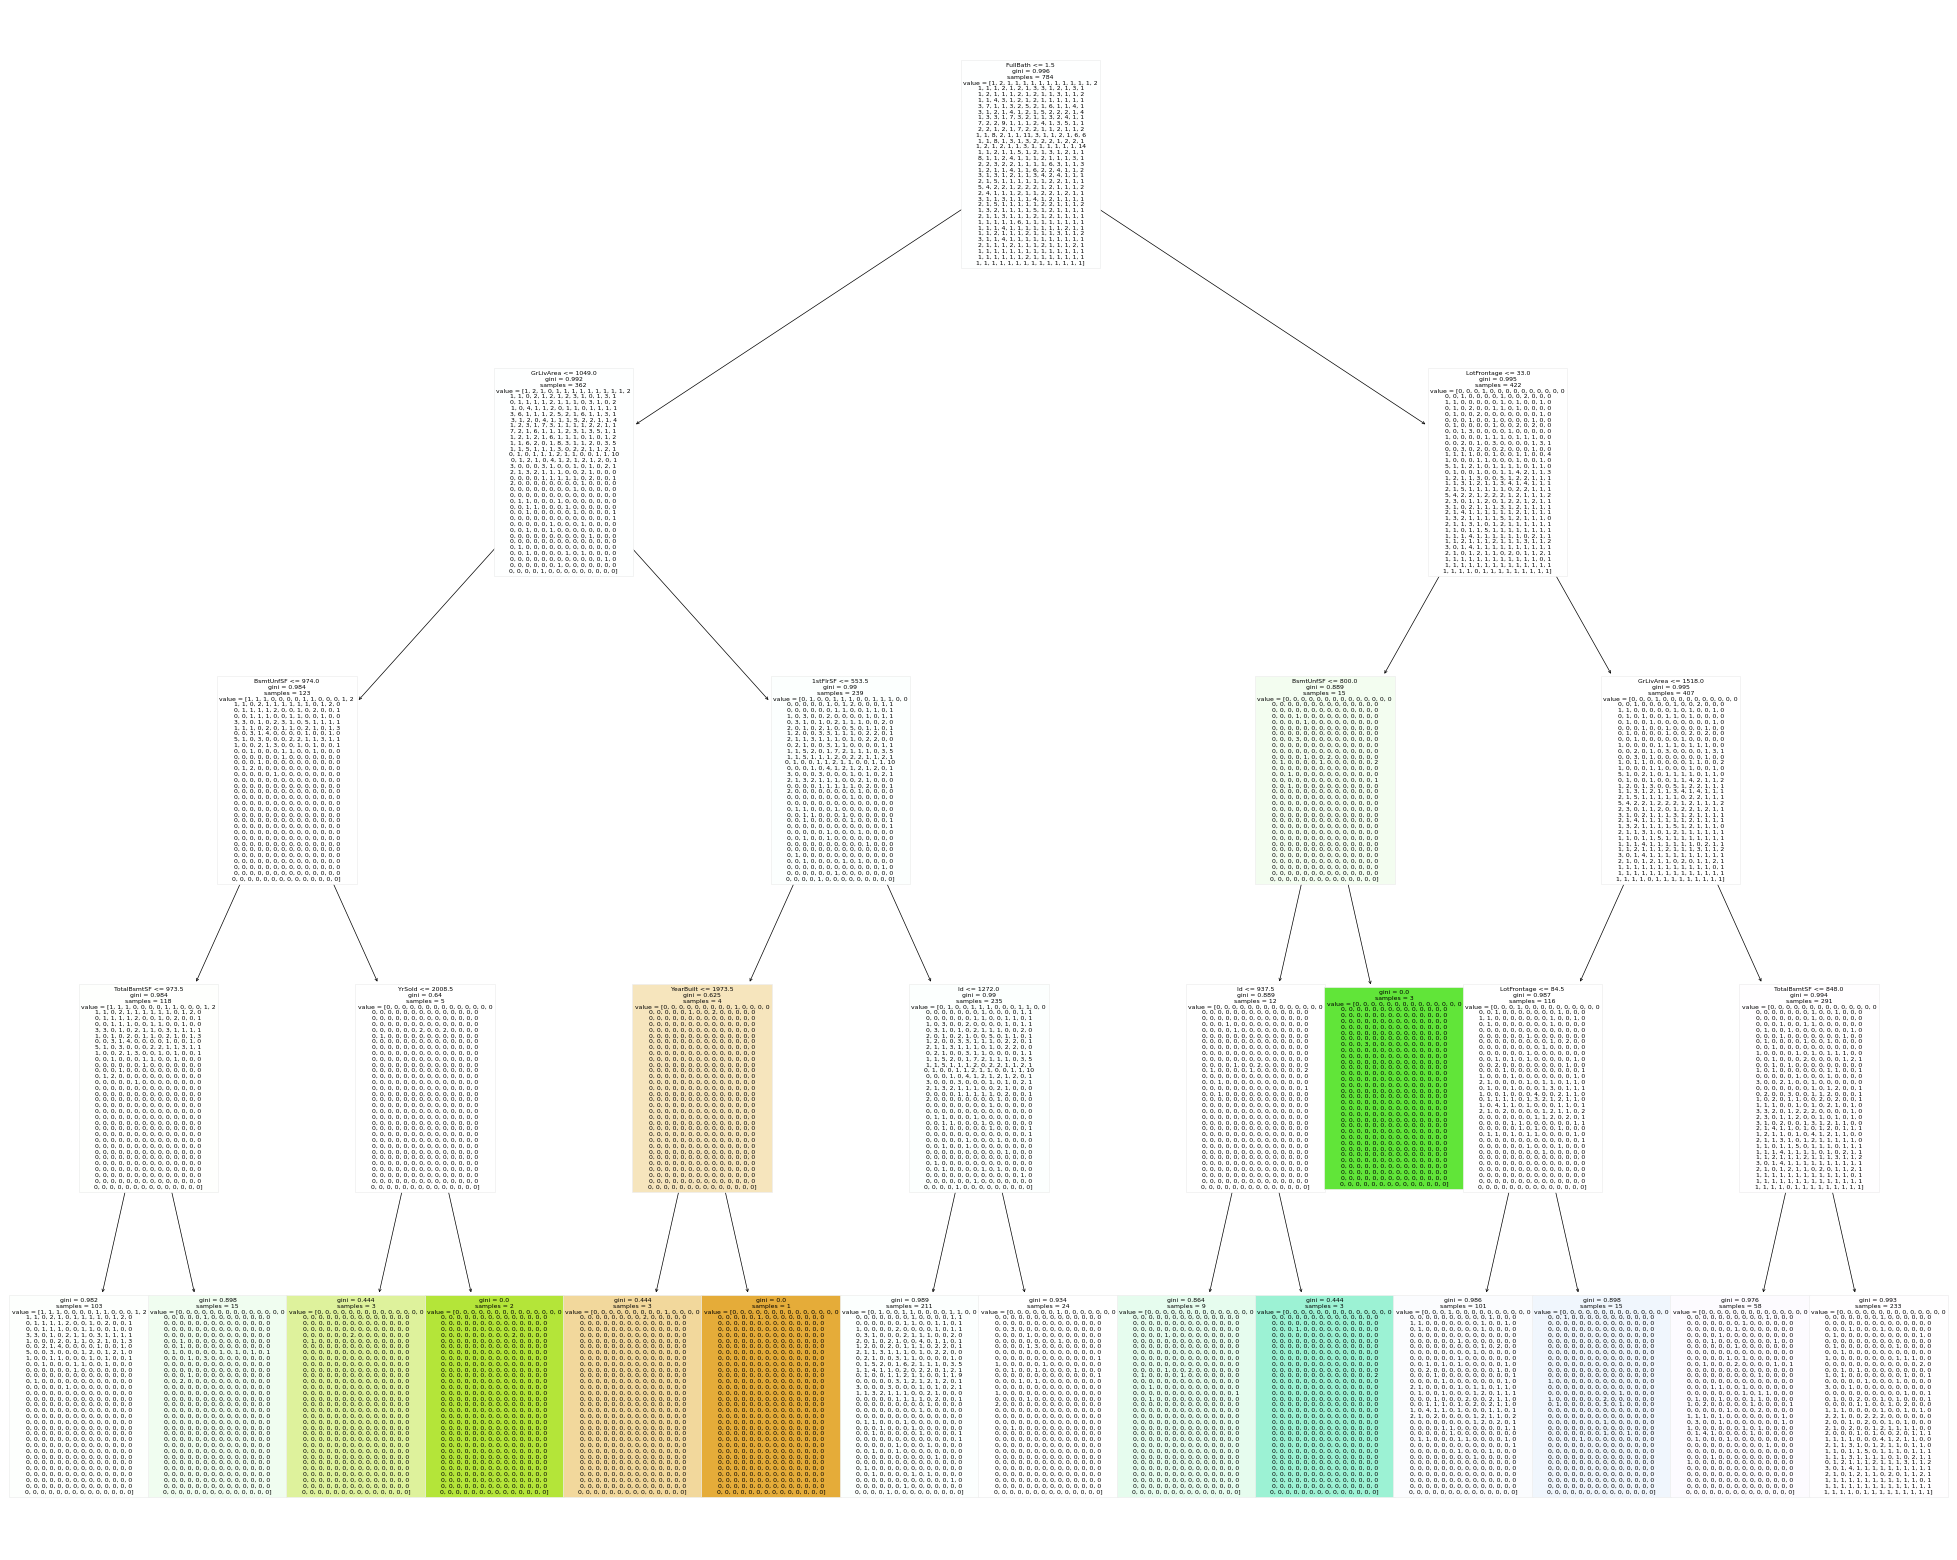

In [126]:
model2 = DecisionTreeClassifier(max_depth=10, random_state=42)
model2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print ("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print ("Precision:", metrics.precision_score(y_test,y_pred2,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred2,average='weighted', zero_division=0))

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=X.columns, filled=True)

Accuracy: 0.0
Precision: 0.0
Recall:  0.0


[Text(0.5267857142857143, 0.9, 'FullBath <= 1.5\ngini = 0.996\nsamples = 784\nvalue = [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2\n1, 1, 1, 2, 1, 2, 1, 3, 3, 1, 2, 1, 3, 1\n1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2\n1, 1, 4, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1\n3, 7, 1, 1, 3, 2, 5, 2, 1, 6, 1, 1, 4, 1\n3, 1, 2, 1, 4, 1, 2, 1, 5, 2, 2, 2, 1, 4\n1, 3, 3, 1, 7, 3, 2, 1, 1, 3, 2, 4, 1, 1\n7, 2, 2, 9, 1, 1, 1, 2, 4, 1, 3, 5, 1, 1\n2, 2, 1, 2, 1, 7, 2, 2, 1, 1, 2, 1, 1, 2\n1, 1, 8, 2, 1, 1, 11, 3, 1, 1, 2, 1, 6, 6\n1, 1, 8, 1, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1\n1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 14\n1, 1, 2, 1, 1, 5, 1, 2, 1, 3, 1, 2, 1, 1\n8, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 3, 1\n2, 2, 3, 2, 2, 1, 1, 1, 1, 6, 3, 1, 1, 3\n1, 2, 1, 1, 4, 1, 1, 6, 2, 2, 4, 1, 1, 2\n3, 1, 3, 1, 2, 1, 1, 3, 4, 2, 4, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1\n5, 4, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2\n2, 4, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1\n3, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 2, 2,

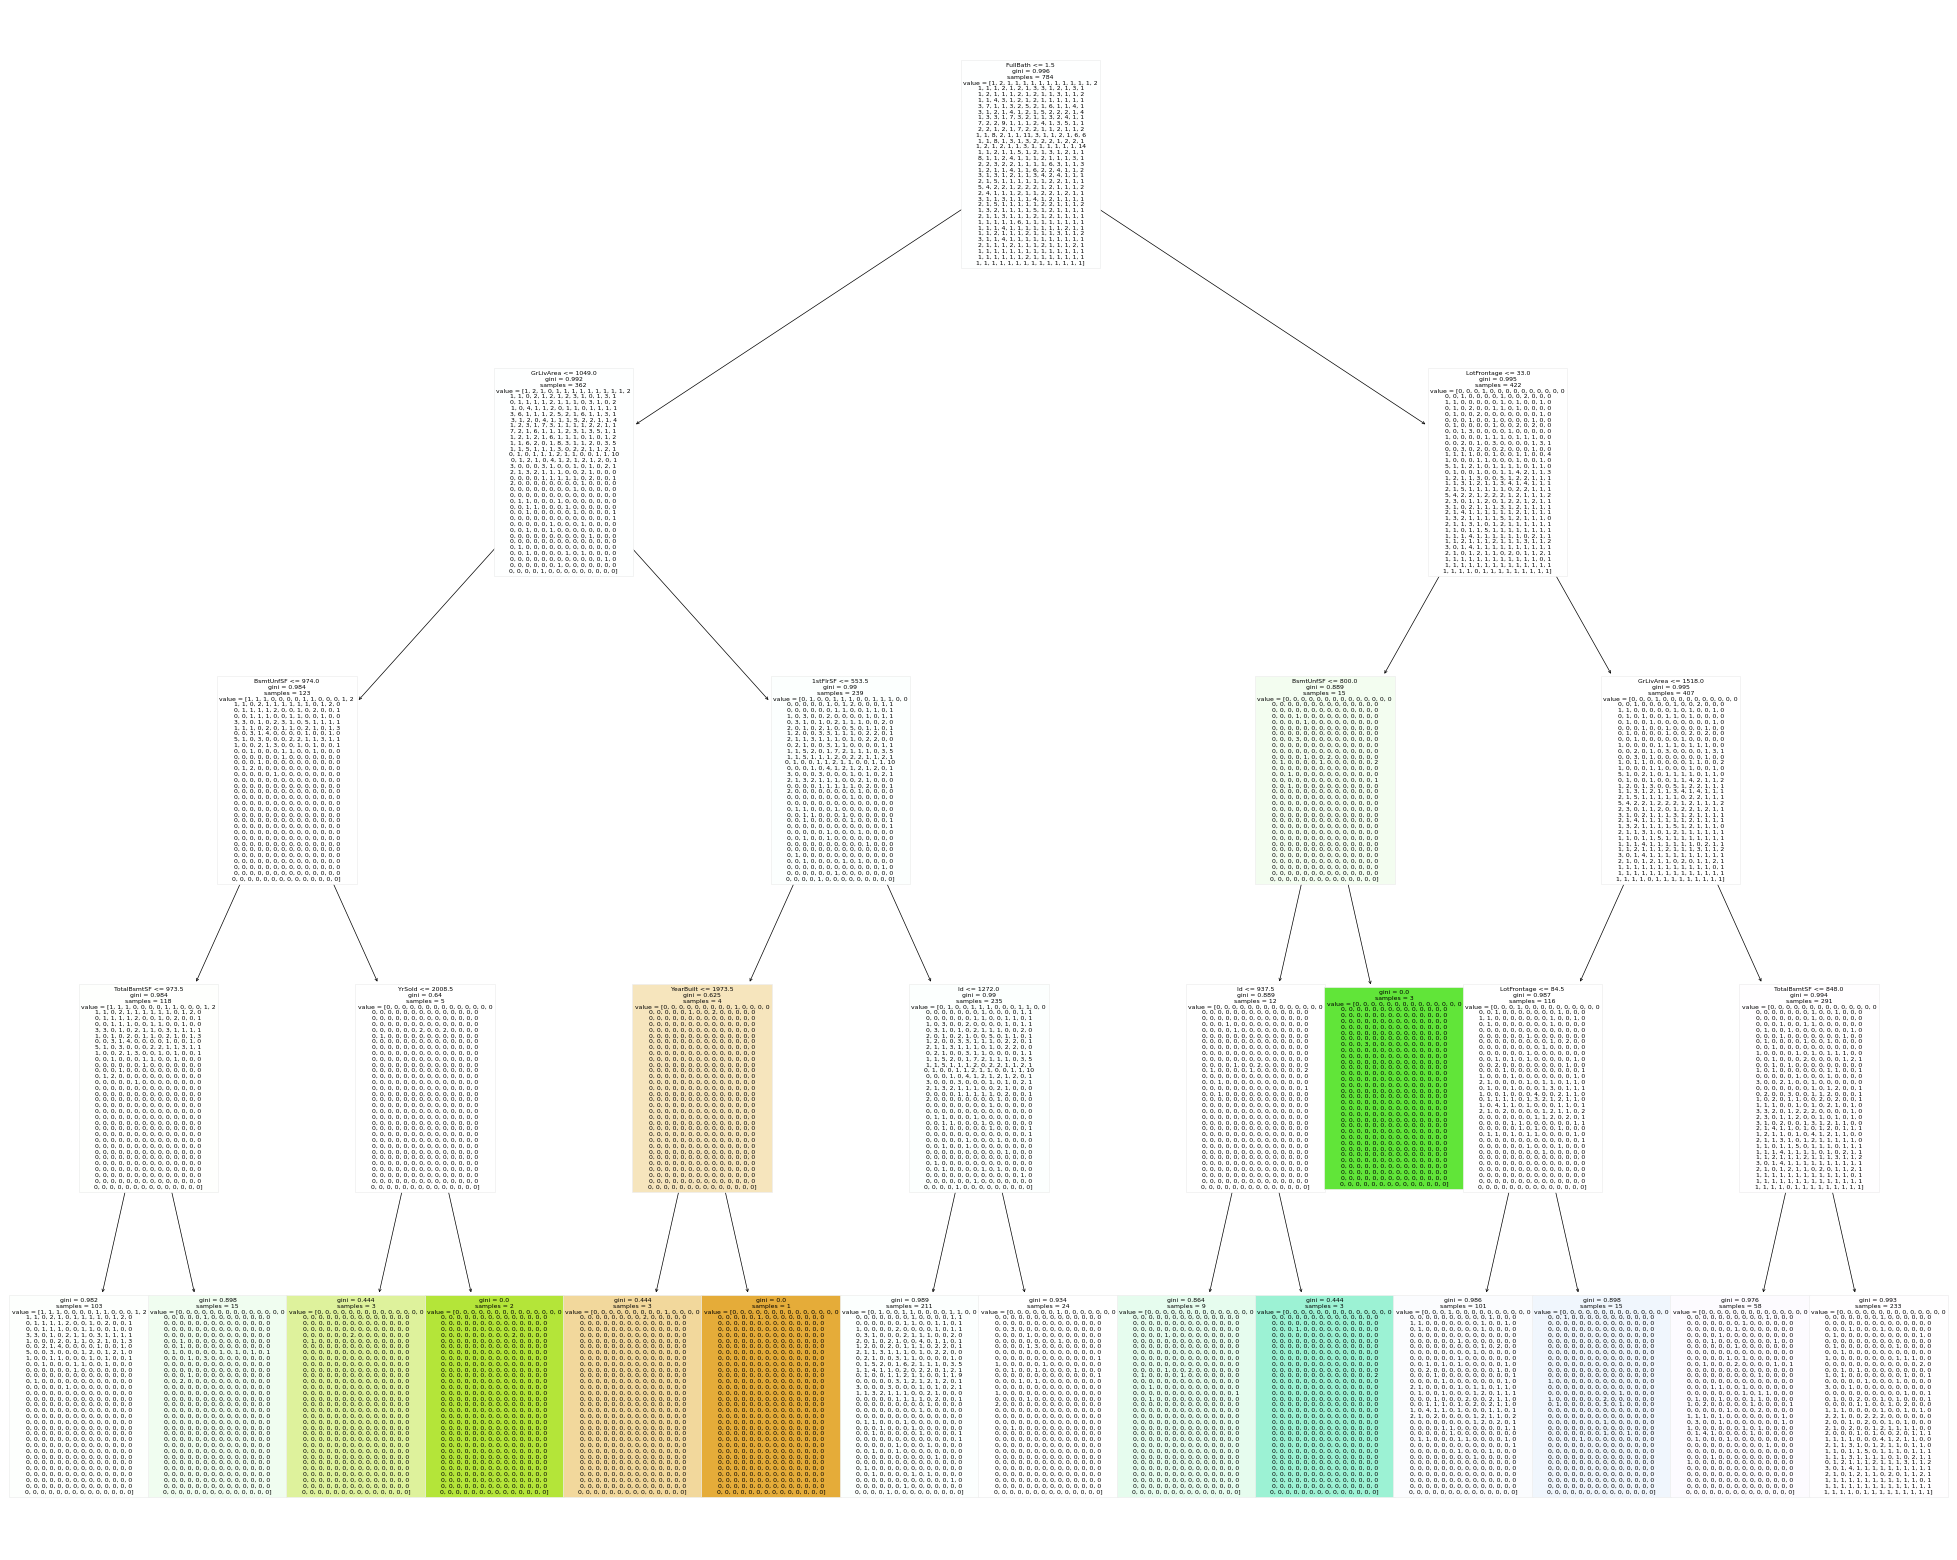

In [127]:
model3 = DecisionTreeClassifier(max_depth=2, random_state=42)
model3 = model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print ("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print ("Precision:", metrics.precision_score(y_test,y_pred3,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred3,average='weighted', zero_division=0))

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=X.columns, filled=True)

El mejor modelo para predecir el precio de las casas es el modelo 3.

5. Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿cuál lo hizo mejor?

Se encontro que los resultados del modelo de regresion lineal de la hoja anterior fueron mejores, ya que el accuracy, la precision y el recll, todos fueron mejores que cualquiera de los modelos intentados en esta hoja.

6. Dependiendo del análisis exploratorio elaborado cree una variable respuesta que le permita clasificar las casas en Económicas, Intermedias o Caras. Los límites de estas clases deben tener un fundamento en la distribución de los datos de precios, y estar bien explicados


[Text(0, 0, '487'), Text(0, 0, '490'), Text(0, 0, '483')]

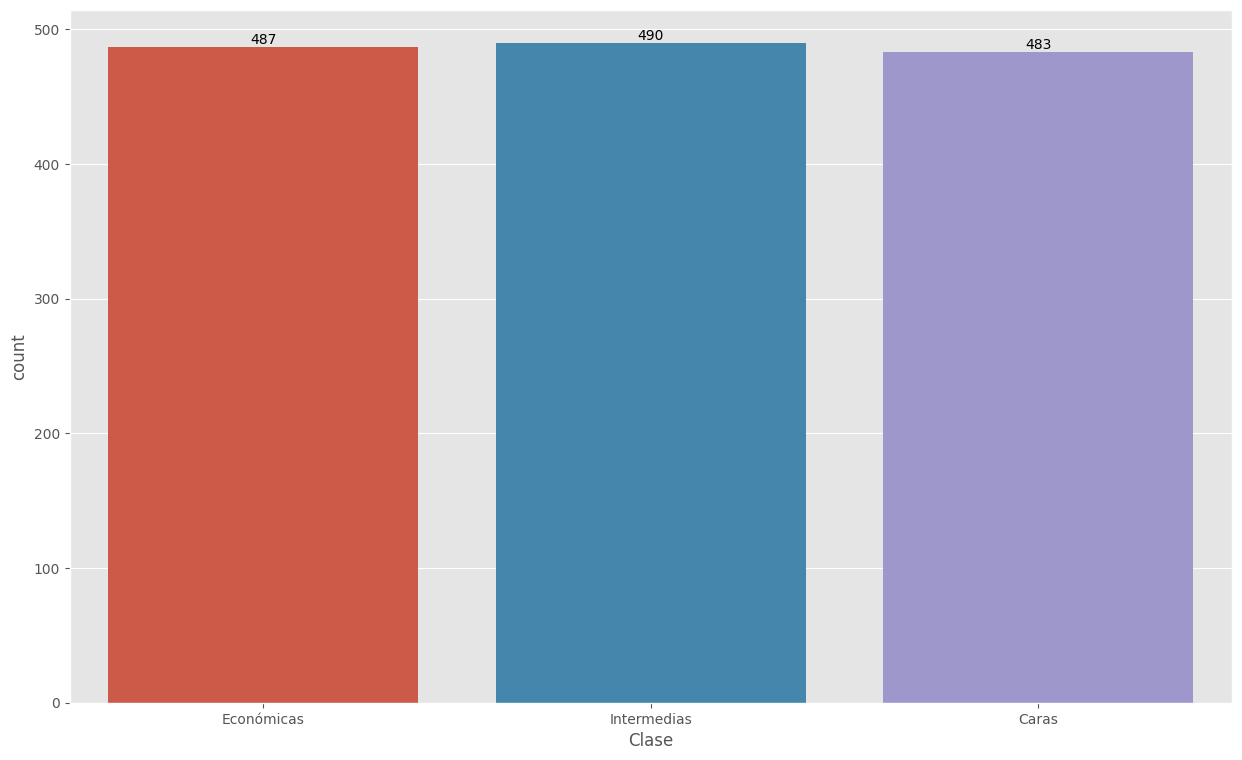

In [128]:
datos1 = pd.read_csv("train.csv", encoding="latin1")
numericas = datos1.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])

ax = sb.countplot(data=numericas, x="Clase")
ax.bar_label(ax.containers[0])


7. Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto anterior. Explique los resultados a los que llega. Muestre el modelo gráficamente. Recuerde que la nueva variable respuesta es categórica, pero se generó a partir de los precios de las casas, no incluya el precio de venta para entrenar el modelo.

[Text(0.4990498310810811, 0.9666666666666667, 'OverallQual <= 6.5\ngini = 0.667\nsamples = 1021\nvalue = [347, 339, 335]\nclass = Económicas'),
 Text(0.22501407657657657, 0.9, 'GrLivArea <= 1051.5\ngini = 0.555\nsamples = 622\nvalue = [44, 329, 249]\nclass = Intermedias'),
 Text(0.07807807807807808, 0.8333333333333334, 'YearBuilt <= 1975.5\ngini = 0.237\nsamples = 197\nvalue = [0, 170, 27]\nclass = Intermedias'),
 Text(0.03903903903903904, 0.7666666666666667, 'LotArea <= 11220.5\ngini = 0.107\nsamples = 158\nvalue = [0, 149, 9]\nclass = Intermedias'),
 Text(0.024024024024024024, 0.7, 'GarageArea <= 811.0\ngini = 0.054\nsamples = 143\nvalue = [0, 139, 4]\nclass = Intermedias'),
 Text(0.018018018018018018, 0.6333333333333333, 'GarageArea <= 436.0\ngini = 0.041\nsamples = 142\nvalue = [0, 139, 3]\nclass = Intermedias'),
 Text(0.012012012012012012, 0.5666666666666667, 'gini = 0.0\nsamples = 113\nvalue = [0, 113, 0]\nclass = Intermedias'),
 Text(0.024024024024024024, 0.5666666666666667, 'Ma

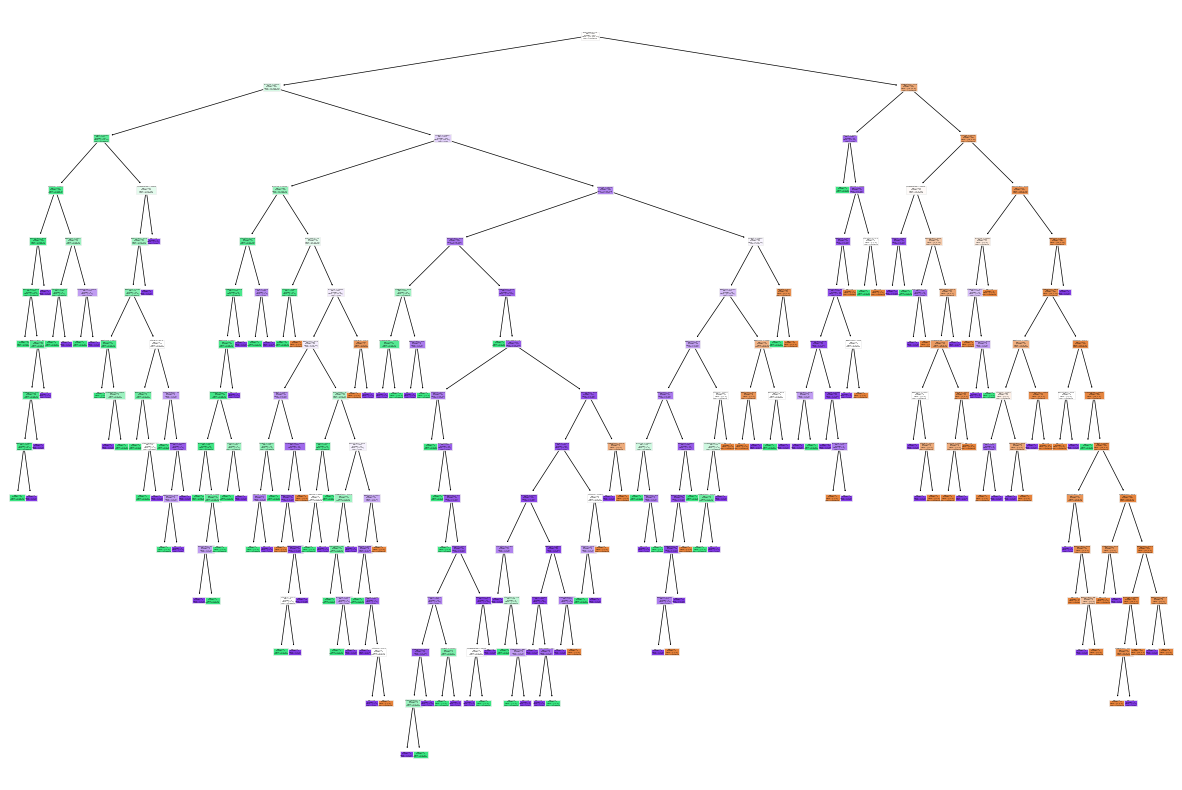

In [133]:
X = numericas.drop(["SalePrice", "Clase"], axis=1)
Y = numericas["Clase"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

plt.figure(figsize=(15,10))
tree.plot_tree(arbol,feature_names=X.columns, class_names=["Económicas", "Intermedias", "Caras"], filled=True)

8. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar.

In [134]:
y_pred = arbol.predict(X_test)

print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))

Accuracy: 0.726027397260274
Precision: 0.7305317651274271
Recall:  0.726027397260274


9. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

In [135]:
cm=metrics.confusion_matrix(y_test, y_pred)
print("Confussion Matrix")
print(cm)
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Confussion Matrix
[[ 98   8  29]
 [  4 112  32]
 [ 26  21 108]]
F1 Score:  0.7275216920559607


10. Entrene un modelo usando validación cruzada, prediga con él. ¿le fue mejor que al modelo anterior?

In [136]:
X = numericas.drop(["SalePrice", "Clase"], axis=1).fillna(0)
Y = numericas["Clase"]
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=5, error_score='raise')
print("Precisions: {}".format(scores))
print("Average Precision: {:.2f}".format(np.mean(scores)))

Precisions: [0.78082192 0.73972603 0.80479452 0.74657534 0.74657534]
Average Precision: 0.76


In [137]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Confussion Matrix
[[ 99   6  30]
 [  4 113  31]
 [ 26  31  98]] 

Accuracy: 0.7077625570776256
Precision: 0.70920679381528
Recall:  0.7077625570776256
F1 Score:  0.7083178152852578


11. Haga al menos, 3 modelos más cambiando la profundidad del árbol. ¿Cuál funcionó mejor?

In [138]:
print("Depth: 4")
clf = DecisionTreeClassifier(max_depth=4)
scores = cross_val_score(clf, X, Y, cv=5, error_score='raise')
print("Precisions: {}".format(scores))
print("Average Precision: {:.2f}".format(np.mean(scores)))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Depth: 4
Precisions: [0.76027397 0.74315068 0.75684932 0.75684932 0.76369863]
Average Precision: 0.76
Confussion Matrix
[[ 99   7  29]
 [  2 113  33]
 [ 22  32 101]] 

Accuracy: 0.7146118721461188
Precission: 0.718556614520812
Recall:  0.7146118721461188
F1 Score:  0.7158837990707292


In [139]:
print("Depth: 10")
clf = DecisionTreeClassifier(max_depth=10)
scores = cross_val_score(clf, X, Y, cv=5, error_score='raise')
print("Precisions: {}".format(scores))
print("Average Precision: {:.2f}".format(np.mean(scores)))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Depth: 10
Precisions: [0.78082192 0.75342466 0.7739726  0.75342466 0.7739726 ]
Average Precision: 0.77
Confussion Matrix
[[103   6  26]
 [  5 110  33]
 [ 25  20 110]] 

Accuracy: 0.7374429223744292
Precission: 0.7423340833285146
Recall:  0.7374429223744292
F1 Score:  0.738957665800476


In [140]:
print("Depth: 16")
clf = DecisionTreeClassifier(max_depth=16)
scores = cross_val_score(clf, X, Y, cv=5, error_score='raise')
print("Precisions: {}".format(scores))
print("Average Precision: {:.2f}".format(np.mean(scores)))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Depth: 16
Precisions: [0.77739726 0.76027397 0.79109589 0.75342466 0.72945205]
Average Precision: 0.76
Confussion Matrix
[[ 93  10  32]
 [  6 114  28]
 [ 24  27 104]] 

Accuracy: 0.7100456621004566
Precission: 0.7125592534161757
Recall:  0.7100456621004566
F1 Score:  0.7106109575509633


El modelo que mejor funciono fue el modelo de menor profundidad, usando un max_depth de 4, donde se encontro una precision promedio muy buena pero con scores de accruracy, precission, recall y f1 considerablemente mejores que los demas modelos.

12. Repita los análisis usando random forest como algoritmo de predicción, explique sus resultados comparando ambos algoritmos.

In [141]:
X = numericas.drop(["SalePrice", "Clase"], axis=1).fillna(0)
y = numericas["Clase"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, train_size=0.7)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

print("R2 score: ", (metrics.r2_score (y_test, predict)))
print("MSE: ", (metrics.mean_squared_error (y_test, predict)))

R2 score:  0.5362066141076277
MSE:  0.3133924657534246


Se puede observar que Random Forest es mucho mas poderoso que un arbol de clasificacion simple ya que es como que utilizara varios de estos en su modelo.